# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo II - Tratamento e Limpeza de Dados</span>


### <span style="color:darkred">Detecção e remoção de outliers</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Referência complementar:__
- CHANDOLA, Varun; BANERJEE, Arindam; KUMAR, Vipin. Outlier detection: a survey. ACM Computing Surveys, v. 14, p. 15, 2007.

***

## Detectando outliers

**Relembrando - outliers, pontos "fora-da-curva" ou pontos aberrantes** : exemplos ou instâncias que, dentre do espaço de possíveis valores, recaem num intervalo *fora* daquele relativo a maior parte dos exemplos de uma base de dados.

Detectar outliers por meio de análise exploratória é útil para entender o comportamento da base de dados.

Existem também métodos **estatísticos** e de **aprendizado de máquina** que auxiliam nesse processo e que podem facilitar essa análise, detectando *outliers* de forma automática.

1. Dispersão: desvio padrão e intervalo interquartil
2. Distribuição: Normal univaridada
3. Agrupamento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
data = pd.read_csv("./dados/houses_to_rent_mba2.csv")
data.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat


In [2]:
data.dtypes

city                object
area               float64
rooms              float64
bathroom             int64
parking spaces     float64
floor               object
hoa                  int64
rent                 int64
tax                 object
insurance            int64
total              float64
page hits            int64
days available       int64
interactions         int64
weeks available      int64
type                object
dtype: object

Vamos visualizar dois atributos para estudar a distribuição dos dados

<AxesSubplot:>

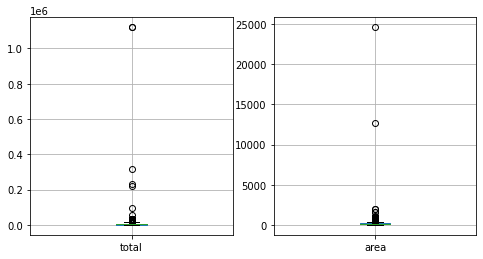

In [3]:
plt.figure(figsize=(8,4))
plt.subplot(121); data.boxplot(['total'])
plt.subplot(122); data.boxplot(['area'])

### 1. Desvio padrão e amplitude inter-quartil (por dispersão)

Para cada atributo, podemos estudar como os valores estão relacionados com a dispersão dos dados.

Entre as medidas de dispersão temos:
* desvio padrão amostral (*standard deviation*)
    Seja $\mu$ a média de uma variável,
    $$\sigma = \frac{\sqrt{ \sum_i (x_i - \mu)^2}}{n-1}$$


* amplitude - ou intervalo - interquartil (IQR, *interquartile range*)
    Sejam:
    - $Q_{1}$ o valor relativo aos primeiros 25% dados,
    - $Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),
    - $Q_{3}$ o valor relativo aos primeiros 75% dos dados,
    
    $$IQR = Q_{3} - Q_{1}$$


<img src="./imagens/IQR.png" width=380>

In [4]:
# esses valores estão disponíveis via describe()
data.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11687.000000,11686.000000,11765.000000,8800.000000,1.176500e+04,11765.000000,11765.000000,1.176500e+04,11765.000000,11765.000000,11765.000000,11765.000000
mean,145.652691,2.496406,2.280408,2.181705,1.162632e+03,4033.429154,56.525032,5.622370e+03,593.139992,73.644454,228.023969,10.307012
std,288.676311,1.165594,1.445071,1.519448,1.486720e+04,3564.190560,97.487374,1.579576e+04,559.727661,35.725794,174.183959,5.101312
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,200.000000,3.000000,2.635000e+02,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,1.600000e+02,1600.000000,22.000000,2.176000e+03,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,5.610000e+02,2790.000000,37.000000,3.762000e+03,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1.300000e+03,5100.000000,70.000000,6.990000e+03,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,1.117000e+06,45000.000000,6000.000000,1.119892e+06,6444.000000,358.000000,2148.000000,51.000000


Pelo método do desvio padrão e IQR temos:

In [5]:
# selecionando segundo o total
Q1 = data['total'].quantile(0.25)
Q3 = data['total'].quantile(0.75)
IQR = Q3 - Q1

desvp = data['total'].std()
media = data['total'].mean()

print("IQR = %.2f" % IQR)
print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

IQR = 4814.00
media = 5622.37, desvio padrao = 15795.76


In [6]:
# apenas outliers segundo std
dataout_std = data[(data['total'] < media-(desvp*2)) 
                   | (data['total'] > media+(desvp*2))]
# apenas inliers segundo std
dc_std = data[(data['total'] >= media-(desvp*2)) 
                   & (data['total'] <= media+(desvp*2))]

In [7]:
dc_std.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11680.000000,11679.000000,11758.000000,8796.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000
mean,145.593408,2.496447,2.279469,2.180991,930.645348,4028.211771,56.452373,5356.795348,593.101718,73.640330,227.988774,10.306430
std,288.705325,1.165218,1.444316,1.518349,1151.665281,3541.282533,97.326654,4566.356503,559.773061,35.730994,174.198150,5.102046
min,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,3.000000,263.500000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,160.000000,1600.000000,22.000000,2173.250000,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,560.000000,2790.000000,37.000000,3760.000000,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1300.000000,5100.000000,70.000000,6990.000000,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,32000.000000,30000.000000,6000.000000,32751.000000,6444.000000,358.000000,2148.000000,51.000000


<AxesSubplot:>

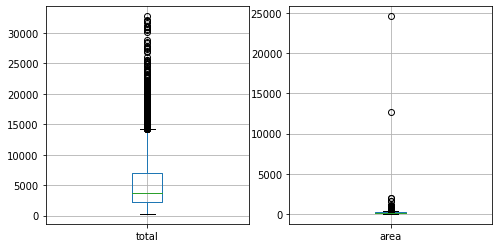

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(121); dc_std.boxplot(['total'])
plt.subplot(122); dc_std.boxplot(['area'])

In [9]:
# apenas outliers segundo IQR
dataout_iqr = data[(data['total'] < Q1-(IQR*1.5)) 
                    | (data['total'] > Q3+(IQR*1.5))]
# apenas inliers segundo IQR
dc_iqr = data[(data['total'] >= Q1-(IQR*1.5)) 
              & (data['total'] <= Q3+(IQR*1.5))]

In [10]:
dc_iqr.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,10993.000000,10994.000000,11068.000000,8135.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,128.370690,2.416409,2.144651,2.032821,820.518883,3432.489971,47.701391,4557.751599,585.927720,73.661637,226.455728,10.309722
std,166.343212,1.132361,1.338094,1.401387,893.913079,2538.420532,72.726753,3233.790034,555.951272,35.654738,172.718755,5.091272
min,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,3.000000,263.500000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,1.000000,170.000000,1550.000000,21.000000,2092.000000,144.000000,51.000000,96.000000,7.000000
50%,86.000000,2.000000,2.000000,2.000000,547.000000,2530.000000,35.000000,3544.500000,400.000000,72.000000,180.000000,10.000000
75%,164.000000,3.000000,3.000000,3.000000,1200.000000,4500.000000,63.000000,6230.000000,900.000000,93.000000,312.000000,13.000000
max,12732.000000,10.000000,25.000000,12.000000,8000.000000,13500.000000,6000.000000,14199.000000,6444.000000,358.000000,2148.000000,51.000000


<AxesSubplot:>

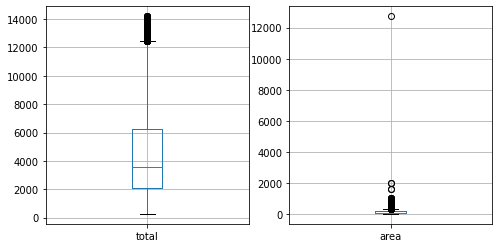

In [11]:
plt.figure(figsize=(8,4))
plt.subplot(121); dc_iqr.boxplot(['total'])
plt.subplot(122); dc_iqr.boxplot(['area'])

### Escrevendo uma função para remoção de outliers segundo o IQR

In [12]:
def remove_outliers_IQR(df, attributes, factor=2):
    """Funcao para remover outliers com base no IQR
    Parametros:
        - df : dataframe
        - attributes: atributos a considerar na remoção
        - factor: fator do IQR a considerar
    Retorno:
        dataframe com os outliers removidos
    """
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*factor)) & (df[var] <= Q3+(IQR*factor)),:]

    return dfn

In [13]:
dc = remove_outliers_IQR(data, data.columns)

**Nota:** <font color="blue">Reparamos que, além de "city", também "floor", "tax" e "type" não são considerados numéricos. Há algo a ser investigado se esses atributos forem ser utilizados!</font>

Text(0.5, 1.0, 'Apos remocao de outliers')

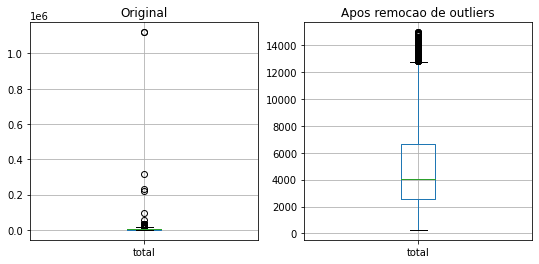

In [14]:
plt.figure(figsize=(9,4))
plt.subplot(121); data.boxplot(['total'])
plt.title('Original')

plt.subplot(122); dc.boxplot(['total']); 
plt.title('Apos remocao de outliers')

<AxesSubplot:>

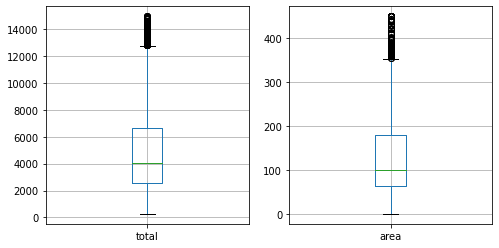

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(121); dc.boxplot(['total'])
plt.subplot(122); dc.boxplot(['area'])

In [15]:
print("Dados originais: ", data.shape[0])
print("Após remoção de outliers: ", dc.shape[0])

Dados originais:  11765
Após remoção de outliers:  7461


### 2. Distribuição dos dados (distribuição Normal)

Podemos assumir que os dados possuem uma distribuição de probabilidade conhecida.

Assim temos um algoritmo que:
1. Estima os parâmetros da distribuição
2. Para cada ponto, computa a probabilidade $p$ de pertencer à distribuição
    1. se $p < \varepsilon$, considerar o ponto como outlier
    2. senão, o ponto é inlier
    
$\varepsilon$ é um limiar (threshold) pré-definido, exemplo: 0.01 (1%)

Vamos utilizar a distribuição Normal ou Gaussiana, mas outras podem ser também utilizadas.

#### Normal univariada

A distribuição Normal (ou Gaussiana) univariada (para uma única variável) é parametrizada por: média (centralidade) e variância (dispersão).
* isso significa que os dados podem ser completamente descritos por esses dois valores.

Escrevemos que um conjunto de dados é bem modelado por uma Gaussiana:
    $$X \sim \mathcal{N}(\mu, \sigma^2)$$
 
A equação que define a distribuição Gaussiana é dada por uma exponencial negativa conforme se afasta de um ponto médio $\mu$:

$$e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Note o termo:
$$-\frac{(x-\mu)^2}{2\sigma^2}$$


In [17]:
mu = 5 # média = 5
s2 = 1 # variancia = 1
x = np.arange(0, 10.00, 0.1)
print(x.shape)

(100,)


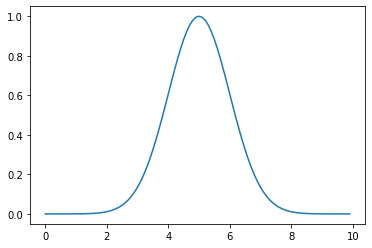

In [18]:
termo_gauss = np.exp(-((x-mu)**2/(2*s2)))
plt.plot(x,termo_gauss)


A probabilidade de um determinado ponto $x$ pertencer à $X$ é dada por:

$$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Esse termo que multiplica a exponencial é para *normalizar* os valores de forma a somar 1, pois isso é **requerido para que consideremos uma distribuição de probabilidade**.
* faz sentido - a soma de todas as probabilidades tem que ser 1 (100%)



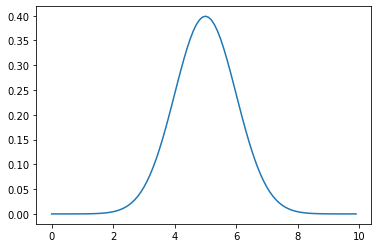

In [19]:
dist_gauss = np.exp(-(((x-mu)**2)/(2*s2)))/(np.sqrt(2*np.pi*s2))
plt.plot(x,dist_gauss)


Vamos analisar um dos atributos, "weeks available" (semanas disponível), primeiro visualizando quantos valores distintos existem e o histograma

In [21]:
data['weeks available'].nunique()

50

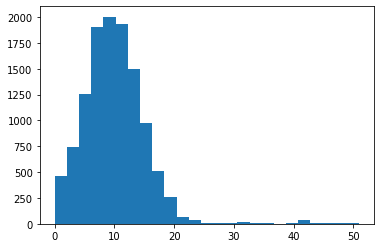

In [22]:
hw = plt.hist(data['weeks available'], bins=25)

Notamos que o atributo parece ter o formato de uma Gaussiana, então vamos aplicar o algoritmo.

Vamos projetar uma função, mas agora que retorne os índices dos prováveis outliers

In [23]:
def detect_outlier_Normal(attribute, epsilon=0.001, plotdist=False):
    """Funcao para detectar outliers com base na distribuicao Gaussiana univariada
    Parametros:
        - attribute: vetor de atributos/features
        - epsilon: limiar para rejeitar pontos como pertencendo a distribuicao (default:0.001)
        - plotdist: opcao que permite grafar a distribuicao com os parametros estimados
    Retorno:
        vetor com os índices dos outliers detectados
    """
    mean = np.mean(attribute)
    stdv  = np.std(attribute)
        
    # array vazio
    outliers = []
    # para cada atributo
    for x,i in zip(attribute, range(0,len(attribute))):
        # computa probabilidade
        p_x = np.exp(-(((x-mean)**2)/(2*stdv**2))) / (np.sqrt(2*np.pi)*stdv)
        # limiar para considerar outlier
        if (p_x < epsilon):
            outliers.append(i)
            
    outliers = np.array(outliers)
    
    # opcao para plotar a distribuicao marcando outliers
    if plotdist:
        x = np.arange(int(mean-4*stdv),int(mean+4*stdv),stdv/100.0)
        dist_gauss = np.exp(-(((x-mean)**2)/(2*(stdv**2)))) / (np.sqrt(2*np.pi)*stdv)
        plt.figure()
        plt.plot(x, dist_gauss)
        plt.plot(attribute[outliers], np.zeros(outliers.shape[0]), 'xr')
    
    return outliers

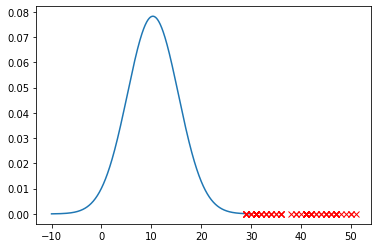

In [27]:
outl = detect_outlier_Normal(data['weeks available'], epsilon=0.0001, plotdist=True)
#print(data.loc[outl,'weeks available'])

### 3. Agrupamento

Outra técnica consiste em utilizar aprendizado não-supervisionado, inferindo agrupamentos e verificando se há pontos isolados em certos grupos.

Vamos considerar um par de atributos para considerar ao *mesmo tempo*: `rent` e `hoa`

O método utilizado será o DBSCAN - *Density-Based Spatial Clustering of Applications with Noise*, mas outros também podem ser empregados na mesma lógica:
* agrupamentos (clusters) isolados com poucos pontos tendem a indicar outliers

Número de grupos estimado: 22
Número de outliers estimados: 71


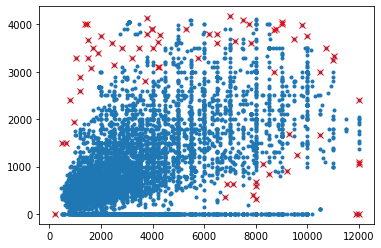

In [29]:
from sklearn.cluster import DBSCAN

X1 = np.array(dc['rent'])
X2 = np.array(dc['hoa'])
X = np.vstack((X1,X2)).T

# aprende o agrupamento com DBSCAN
# argumentos: 
#    eps = distancia máxima para dois pontos serem considerados vizinhos
#        (depende bastante da amplitude dos atributos)
#    min_samples = minimo de exemplos numa vizinhanca para considerar um 
#               agrupamento
db = DBSCAN(eps = 200, min_samples=3).fit(X)
clusters = db.labels_

# número de rótulos -1 sao considerados ruidosos
# vamos considerá-los como outliers
n_outl_ = list(clusters).count(-1)
# fora os outliers, quantos clusters foram encontrados:
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
# índices dos outliers
outl_ind = np.where(clusters==-1)

print('Número de grupos estimado: %d' % n_clusters_)
print('Número de outliers estimados: %d' % n_outl_)

plt.plot(X1, X2,'.')
plt.plot(X1[outl_ind], X2[outl_ind],'xr')
plt.show()

### Resumo e considerações finais

* É possível projetar métodos automáticos para detectar anomalias em bases de dados maiores e mais complexas.


* Nessa aula vimos métodos estatísticos e baseados em aprendizado não-supervisionado.


* Há ainda métodos projetados exclusivamente para detectar anomalias, que também podem ser utilizados. 
    * Esses métodos consideram diferentes embasamentos teóricos, 
    * a maior parte considera que será feito um treinamento com dados não contaminados.
    * podem ser utilizadas para realizar o que é chamado de *detecção de novidades*: reconhecer se um novo ponto é um outlier dado um conjunto de treinamento sem outliers
    

* Para tratar bases de dados, combinar métodos automáticos com análise exploratória é importante
    * produzir um relatório inicial com os problemas levantados e então buscar conhecimento do domínio para entender os dados em mãos
    
    
* Estratégia para melhor controle da remoção dos outliers
    * Ao checar a base de dados, passando por todos os atributos para verificação de outliers, uma opção interessante é criar uma coluna de marcação, em que cada linha é marcada com `True` ou `1` se for encontrado outlier em alguma coluna. Ao final, depois que todas as colunas tiverem sido verificadas, realizar a remoção das linhas indesejadas.